# DEMO: **Process Mining** with Python and **PM4PY**: An Advanced Example   

### Process Mining Overview (Schematic)


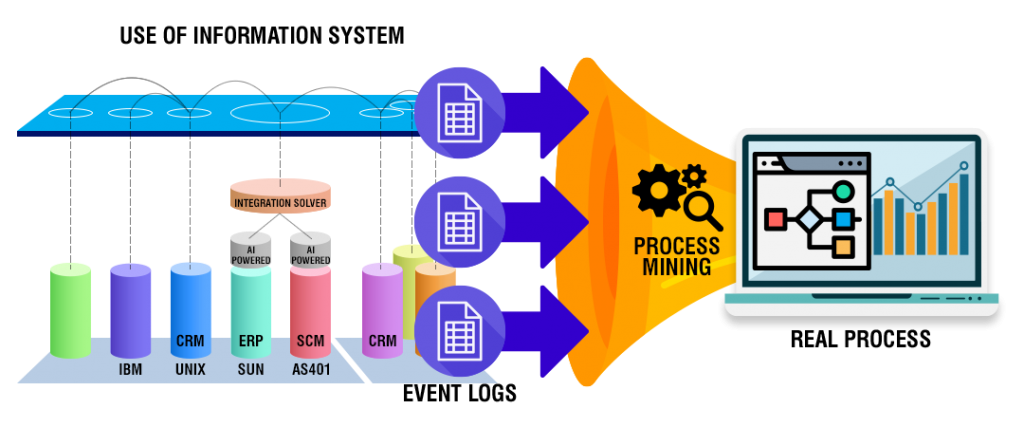


### Basics and Integrations to Other Data Science Libraries

The interest in combining Machine Learning and Process Mining has seen increasing growth in the last few years.

**pm4py** is a python library that supports (state-of-the-art) process mining algorithms in python. It is open source (licensed under GPL) and intended to be used in both academia and industry projects. pm4py is a product of the **Fraunhofer Institute for Applied Information Technology**.

<br>
   
---
Data:
+ [Data_Receipt.xes](https://github.com/pm4py/pm4py-core/tree/release/notebooks/data)

---
Source:  
+ [PM4PY@Fraunhofer](https://pm4py.fit.fraunhofer.de/)
+ Alessandro Berti, Sebastiaan van Zelst, Daniel Schuster. (2023). [PM4Py: A process mining library for Python. Software Impacts, 17, 100556](https://www.sciencedirect.com/science/article/pii/S2665963823000933)
+ [ML4PM 2022](https://ml4pm2022.di.unimi.it/), 3rd Intl. Workshop on leveraging Machine Learning in Process Mining
+ [Process Mining Conference 2022](https://icpmconference.org/2022/program/)


---
+ 24.10.2022 initial version of [Sebastiaan J. van Zelst](https://github.com/pm4py/pm4py-core/blob/release/notebooks/5_advanced_examples.ipynb) (with credits to Alessandro Berti)
+ 30.03.2023 v1 dbe --- adapted version for BINA FS23  
+ 08.01.2024 v2 dbe --- minor corrections for CAS BPE16   
+ April 2024 v3 dbe --- minor corrections for BINA FS24
---

In [9]:
!pip install ipdb

In [10]:
## import ipdb
## %pdb on

In [11]:
## %pdb off

## A) Setup Environment / Installing pm4py first

In [12]:
!pip install pm4py

In [13]:
import pandas as pd
import pm4py

In [14]:
from   IPython.display import Markdown, display

# a markdown formatted print output function printmd()
def printmd(string):
    display(Markdown(string))

---   
##  B) Load, Transform and Inspect Data

In [15]:
logfilePATH = 'sample_data/'
logfileNAME = 'Data_Receipt.xes'

logFILE = logfilePATH + logfileNAME

In [16]:
# load log data from XES file
log = pm4py.read_xes(logFILE)

/usr/local/lib/python3.10/dist-packages/pm4py/util/dt_parsing/parser.py:77: UserWarning: ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
  warnings.warn(


parsing log, completed traces ::   0%|          | 0/1434 [00:00<?, ?it/s]

In [17]:
# convert log event data into a pandas dataframe
df = pm4py.convert_to_dataframe(log)

# format the timestamp column
df['time:timestamp']=pd.to_datetime(df['time:timestamp'], utc=True)

df.head()

org:group concept:instance org:resource                        concept:name  \
0   Group 1       task-42933   Resource21             Confirmation of receipt   
1   Group 4       task-42935   Resource10   T02 Check confirmation of receipt   
2   Group 1       task-42957   Resource21  T03 Adjust confirmation of receipt   
3   Group 4       task-47958   Resource21   T02 Check confirmation of receipt   
4     EMPTY       task-43021   Resource30             Confirmation of receipt   

                    time:timestamp lifecycle:transition  \
0 2011-10-11 13:45:40.276000+00:00             complete   
1 2011-10-12 08:26:25.398000+00:00             complete   
2 2011-11-24 15:36:51.302000+00:00             complete   
3 2011-11-24 15:37:16.553000+00:00             complete   
4 2011-10-18 13:46:39.679000+00:00             complete   

                    case:startdate case:responsible  \
0 2011-10-11 13:42:22.688000+00:00       Resource21   
1 2011-10-11 13:42:22.688000+00:00       Resource21   
2 2011-10-11 13:42:22.688000+00:00       Resource21   
3 2011-10-11 13:42:22.688000+00:00       Resource21   
4 2011-10-11 01:06:40.020000+00:00       Resource04   

              case:enddate_planned case:department case:group  \
0 2011-12-06 13:41:31.788000+00:00         General    Group 2   
1 2011-12-06 13:41:31.788000+00:00         General    Group 2   
2 2011-12-06 13:41:31.788000+00:00         General    Group 2   
3 2011-12-06 13:41:31.788000+00:00         General    Group 2   
4 2011-12-06 01:06:40.010000+00:00         General    Group 5   

  case:concept:name                    case:deadline case:channel  \
0        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
1        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
2        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
3        case-10011 2011-12-06 13:41:31.788000+00:00     Internet   
4        case-10017        2011-12-06 01:06:40+00:00     Internet   

                      case:enddate  
0                              NaT  
1                              NaT  
2                              NaT  
3                              NaT  
4 2011-10-18 13:56:55.943000+00:00

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8577 entries, 0 to 8576
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   org:group             8577 non-null   object             
 1   concept:instance      8577 non-null   object             
 2   org:resource          8577 non-null   object             
 3   concept:name          8577 non-null   object             
 4   time:timestamp        8577 non-null   datetime64[ns, UTC]
 5   lifecycle:transition  8577 non-null   object             
 6   case:startdate        8577 non-null   datetime64[ns, UTC]
 7   case:responsible      8577 non-null   object             
 8   case:enddate_planned  8577 non-null   datetime64[ns, UTC]
 9   case:department       8577 non-null   object             
 10  case:group            3616 non-null   object             
 11  case:concept:name     8577 non-null   object             
 12  case:d

In [19]:
df.describe().T

count unique                      top  freq  \
org:group             8577     10                  Group 1  3152   
concept:instance      8577   8577               task-43564     1   
org:resource          8577     48               Resource01  1228   
concept:name          8577     27  Confirmation of receipt  1434   
time:timestamp        8577    NaN                      NaN   NaN   
lifecycle:transition  8577      1                 complete  8577   
case:startdate        8577    NaN                      NaN   NaN   
case:responsible      8577     39               Resource11  2066   
case:enddate_planned  8577    NaN                      NaN   NaN   
case:department       8577      3                  General  8400   
case:group            3616      7                  Group 5  1926   
case:concept:name     8577   1434                case-9289    25   
case:deadline         8577    NaN                      NaN   NaN   
case:channel          8577      5                 Internet  7478   
case:enddate          7960    NaN                      NaN   NaN   

                                                    mean  \
org:group                                            NaT   
concept:instance                                     NaT   
org:resource                                         NaT   
concept:name                                         NaT   
time:timestamp       2011-05-23 10:15:17.176715264+00:00   
lifecycle:transition                                 NaT   
case:startdate       2011-04-28 18:08:22.740541952+00:00   
case:responsible                                     NaT   
case:enddate_planned 2011-07-02 17:05:36.757953280+00:00   
case:department                                      NaT   
case:group                                           NaT   
case:concept:name                                    NaT   
case:deadline        2011-07-03 03:43:35.862059520+00:00   
case:channel                                         NaT   
case:enddate         2011-06-16 19:36:46.674388992+00:00   

                                                  min  \
org:group                                         NaT   
concept:instance                                  NaT   
org:resource                                      NaT   
concept:name                                      NaT   
time:timestamp       2010-10-02 09:20:39.266000+00:00   
lifecycle:transition                              NaT   
case:startdate       2010-10-01 00:00:00.020000+00:00   
case:responsible                                  NaT   
case:enddate_planned 2010-11-26 00:00:00.010000+00:00   
case:department                                   NaT   
case:group                                        NaT   
case:concept:name                                 NaT   
case:deadline               2010-11-26 00:00:00+00:00   
case:channel                                      NaT   
case:enddate         2010-10-26 15:28:42.703000+00:00   

                                                     25%  \
org:group                                            NaT   
concept:instance                                     NaT   
org:resource                                         NaT   
concept:name                                         NaT   
time:timestamp       2011-02-03 08:43:26.736999936+00:00   
lifecycle:transition                                 NaT   
case:startdate       2011-01-10 00:00:00.009999872+00:00   
case:responsible                                     NaT   
case:enddate_planned 2011-03-21 01:06:40.009999872+00:00   
case:department                                      NaT   
case:group                                           NaT   
case:concept:name                                    NaT   
case:deadline                  2011-03-22 00:00:00+00:00   
case:channel                                         NaT   
case:enddate         2011-03-09 14:40:03.532999936+00:00   

                                                     50%  \
org:group                            

#### Inspect a **single Case**

In [20]:
# Inspect a single case
case10017 = df[df['case:concept:name'] =='case-10017']

case10017

org:group concept:instance org:resource  \
4      EMPTY       task-43021   Resource30   
5    Group 1       task-43672   Resource30   
6    Group 4       task-43671   Resource30   
7    Group 1       task-43674   Resource30   
8    Group 4       task-43675   Resource30   
9    Group 1       task-43673   Resource30   
10   Group 1       task-43676   Resource30   
11   Group 4       task-43679   Resource30   
12   Group 1       task-43686       admin2   

                                  concept:name  \
4                      Confirmation of receipt   
5       T06 Determine necessity of stop advice   
6            T02 Check confirmation of receipt   
7           T03 Adjust confirmation of receipt   
8            T02 Check confirmation of receipt   
9   T10 Determine necessity to stop indication   
10          T03 Adjust confirmation of receipt   
11           T02 Check confirmation of receipt   
12          T03 Adjust confirmation of receipt   

                     time:timestamp lifecycle:transition  \
4  2011-10-18 13:46:39.679000+00:00             complete   
5  2011-10-18 13:47:06.950000+00:00             complete   
6  2011-10-18 13:47:26.235000+00:00             complete   
7  2011-10-18 13:47:41.811000+00:00             complete   
8  2011-10-18 13:47:57.979000+00:00             complete   
9  2011-10-18 13:48:15.357000+00:00             complete   
10 2011-10-18 13:48:30.632000+00:00             complete   
11 2011-10-18 13:51:01.525000+00:00             complete   
12 2011-10-18 13:56:57.603000+00:00             complete   

                     case:startdate case:responsible  \
4  2011-10-11 01:06:40.020000+00:00       Resource04   
5  2011-10-11 01:06:40.020000+00:00       Resource04   
6  2011-10-11 01:06:40.020000+00:00       Resource04   
7  2011-10-11 01:06:40.020000+00:00       Resource04   
8  2011-10-11 01:06:40.020000+00:00       Resource04   
9  2011-10-11 01:06:40.020000+00:00       Resource04   
10 2011-10-11 01:06:40.020000+00:00       Resource04   
11 2011-10-11 01:06:40.020000+00:00       Resource04   
12 2011-10-11 01:06:40.020000+00:00       Resource04   

               case:enddate_planned case:department case:group  \
4  2011-12-06 01:06:40.010000+00:00         General    Group 5   
5  2011-12-06 01:06:40.010000+00:00         General    Group 5   
6  2011-12-06 01:06:40.010000+00:00         General    Group 5   
7  2011-12-06 01:06:40.010000+00:00         General    Group 5   
8  2011-12-06 01:06:40.010000+00:00         General    Group 5   
9  2011-12-06 01:06:40.010000+00:00         General    Group 5   
10 2011-12-06 01:06:40.010000+00:00         General    Group 5   
11 2011-12-06 01:06:40.010000+00:00         General    Group 5   
12 2011-12-06 01:06:40.010000+00:00         General    Group 5   

   case:concept:name             case:deadline case:channel  \
4         case-10017 2011-12-06 01:06:40+00:00     Internet   
5         case-10017 2011-12-06 01:06:40+00:00     Internet   
6         case-10017 2011-12-06 01:06:40+00:00     Internet   
7         case-10017 2011-12-06 01:06:40+00:00     Internet   
8         case-10017 2011-12-06 01:06:40+00:00     Internet   
9         case-10017 2011-12-06 01:06:40+00:00     Internet   
10        case-10017 2011-12-06 01:06:40+00:00     Internet   
11        case-10017 2011-12-06 01:06:40+00:00     Internet   
12        case-10017 2011-12-06 01:06:40+00:00     Internet   

                       case:enddate  
4  2011-10-18 13:56:55.943000+00:00  
5  2011-10-18 13:56:55.943000+00:00  
6  2011-10-18 13:56:55.943000+00:00  
7  2011-10-18 13:56:55.943000+00:00  
8  2011-10-18 13:56:55.943000+00:00  
9  2011-10-18 13:56:55.943000+00:00  
10 2011-10-18 13:56:55.943000+00:00  
11 2011-10-18 13:56:55.943000+00:00  
12 2011-10-18 13:56:55.943000+00:00

---   
## C) Data Exploration with [Pandas](https://pandas.pydata.org/)

#### Number of (unique) **Cases**

In [21]:
no_cases = df['case:concept:name'].nunique()

printmd('> Number of **Cases** : {}'.format(no_cases))

> Number of **Cases** : 1434

#### List of **Activity Ocurrences**

In [22]:
df["concept:name"].value_counts()

concept:name
Confirmation of receipt                                  1434
T06 Determine necessity of stop advice                   1416
T02 Check confirmation of receipt                        1368
T04 Determine confirmation of receipt                    1307
T05 Print and send confirmation of receipt               1300
T10 Determine necessity to stop indication               1283
T03 Adjust confirmation of receipt                         55
T07-1 Draft intern advice aspect 1                         45
T11 Create document X request unlicensed                   44
T12 Check document X request unlicensed                    41
T14 Determine document X request unlicensed                39
T15 Print document X request unlicensed                    39
T07-2 Draft intern advice aspect 2                         32
T07-5 Draft intern advice aspect 5                         27
T17 Check report Y to stop indication                      26
T20 Print report Y to stop indication                    

#### List of **Start Activities**

In [23]:
df.groupby("case:concept:name").first()["concept:name"].value_counts()

concept:name
Confirmation of receipt    1434
Name: count, dtype: int64

#### List of **End Activities**

In [24]:
df.groupby("case:concept:name").last()["concept:name"].value_counts()

concept:name
T10 Determine necessity to stop indication    828
T05 Print and send confirmation of receipt    400
Confirmation of receipt                       116
T15 Print document X request unlicensed        39
T06 Determine necessity of stop advice         16
T20 Print report Y to stop indication          15
T02 Check confirmation of receipt               8
T11 Create document X request unlicensed        4
T03 Adjust confirmation of receipt              2
T04 Determine confirmation of receipt           2
T07-1 Draft intern advice aspect 1              1
T13 Adjust document X request unlicensed        1
T07-5 Draft intern advice aspect 5              1
T07-2 Draft intern advice aspect 2              1
Name: count, dtype: int64

---   
## D) Data Exploration and Visualization with [PM4PY](https://pm4py.fit.fraunhofer.de/)

### D1) Event/Case **Distribution** Analysis

#### Events per Day of Week

> Use Dataframe object (`df`)   

*Note: matplotlib is inside the pm4py library!*

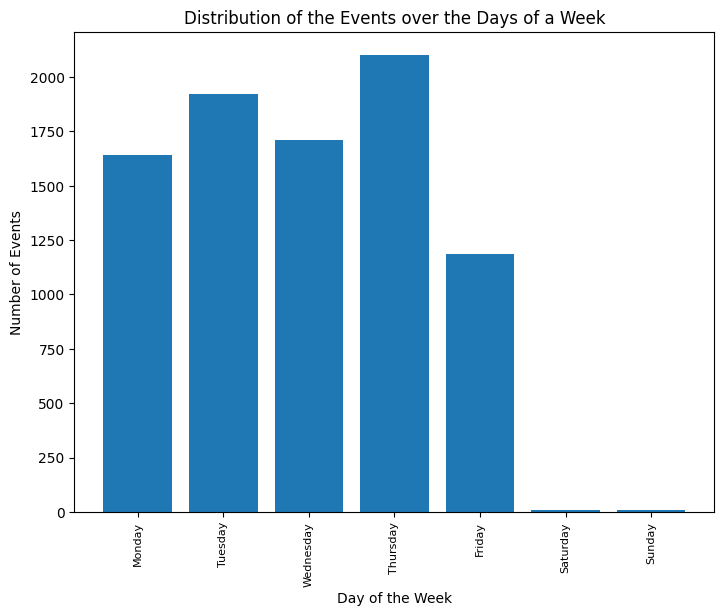

In [25]:
# Note: matplotlib is inside!
pm4py.view_events_distribution_graph(df,
                                     distr_type="days_week")

#### Events per Hour of Day

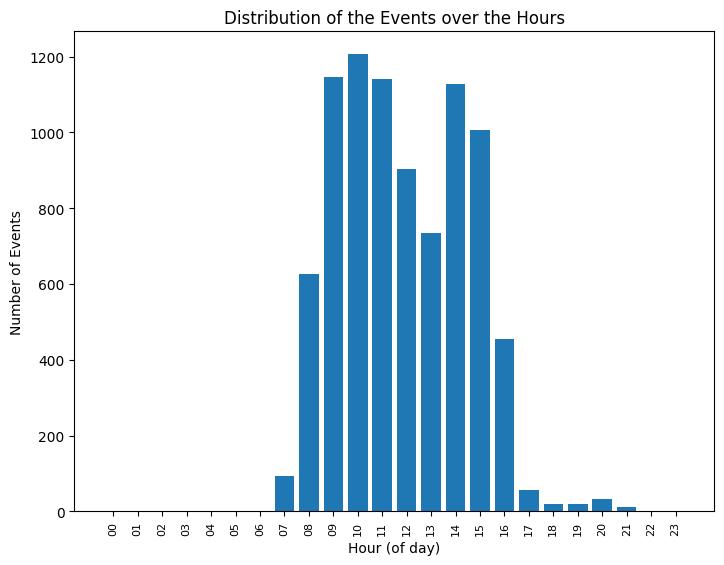

In [26]:
pm4py.view_events_distribution_graph(df,
                                     distr_type="hours")

#### Events per Weeks of Year

> similar for "months" or "years"

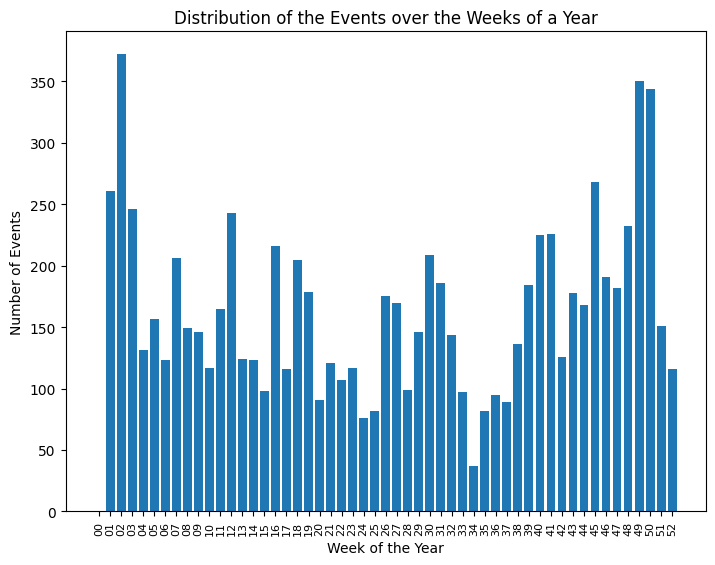

In [27]:
pm4py.view_events_distribution_graph(df,
                                     distr_type="weeks")

#### Event Distribution Plot  

> Use (raw) Log object (`log`)

*Note: matplotlib is inside the pm4py library!*

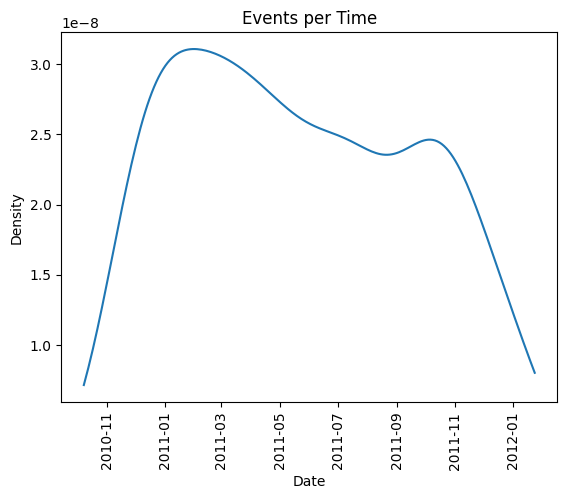

In [28]:
pm4py.view_events_per_time_graph(log)

#### Case Duration Distribution

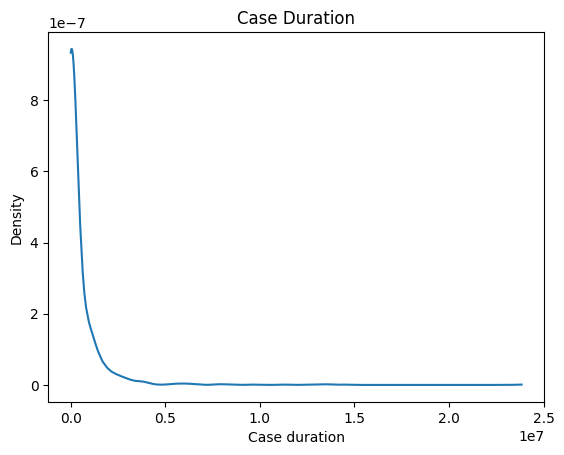

In [29]:
pm4py.view_case_duration_graph(log)

---  
### D2) **Discovering Process** Maps  


A [Directly-Follows Graph (DFG)]( https://www.processmining.org/process-discovery.html) is the *simplest representation of the process models*. In a directly-follows graph, each node represents an activity and the arcs describe the relationship between various activities.  

Typically in a process model, the directly-follows graph has a source and sink representing the start and end activities. An arc in the directly-follows graph between any two activities represents that the source activity is directly followed by the sink activity in the event log.  

Let $L{\in}\mathcal{B}(\Sigma^*)$ be an event log where $\Sigma$ represents *all possible activities*, and $\mathcal{B}(\Sigma^*)$ represents all *multisets over sequences of activities*  

Given $a,b{\in}\Sigma$,  we write $a{>_{L}}b$, iff $\exists{\sigma{\in}L}\left(\exists{1{\leq}i{<}|\sigma|}\left(\sigma(i){=}a{\wedge}\sigma(i{+}1){=}b\right)\right)$

In [30]:
#  discover DFG from event dataframe `df`
dfg = pm4py.discover_dfg(df)

dfg

({('Confirmation of receipt', 'T02 Check confirmation of receipt'): 1079,
  ('Confirmation of receipt', 'T06 Determine necessity of stop advice'): 239,
  ('T02 Check confirmation of receipt',
   'T03 Adjust confirmation of receipt'): 43,
  ('T02 Check confirmation of receipt',
   'T04 Determine confirmation of receipt'): 1119,
  ('T02 Check confirmation of receipt',
   'T05 Print and send confirmation of receipt'): 1,
  ('T02 Check confirmation of receipt',
   'T06 Determine necessity of stop advice'): 178,
  ('T02 Check confirmation of receipt',
   'T07-1 Draft intern advice aspect 1'): 2,
  ('T02 Check confirmation of receipt',
   'T07-2 Draft intern advice aspect 2'): 1,
  ('T02 Check confirmation of receipt',
   'T07-5 Draft intern advice aspect 5'): 1,
  ('T02 Check confirmation of receipt',
   'T10 Determine necessity to stop indication'): 15,
  ('T03 Adjust confirmation of receipt',
   'T02 Check confirmation of receipt'): 51,
  ('T03 Adjust confirmation of receipt',
   'T06 Det

#### **Graph** Structure

In [31]:
dfg_graph = dfg[0] # graph structure

print(dfg_graph)

{('Confirmation of receipt', 'T02 Check confirmation of receipt'): 1079, ('Confirmation of receipt', 'T06 Determine necessity of stop advice'): 239, ('T02 Check confirmation of receipt', 'T03 Adjust confirmation of receipt'): 43, ('T02 Check confirmation of receipt', 'T04 Determine confirmation of receipt'): 1119, ('T02 Check confirmation of receipt', 'T05 Print and send confirmation of receipt'): 1, ('T02 Check confirmation of receipt', 'T06 Determine necessity of stop advice'): 178, ('T02 Check confirmation of receipt', 'T07-1 Draft intern advice aspect 1'): 2, ('T02 Check confirmation of receipt', 'T07-2 Draft intern advice aspect 2'): 1, ('T02 Check confirmation of receipt', 'T07-5 Draft intern advice aspect 5'): 1, ('T02 Check confirmation of receipt', 'T10 Determine necessity to stop indication'): 15, ('T03 Adjust confirmation of receipt', 'T02 Check confirmation of receipt'): 51, ('T03 Adjust confirmation of receipt', 'T06 Determine necessity of stop advice'): 2, ('T04 Determine

#### List/Occurence of **Start Activities**

In [32]:
dfg_start_activities = print(dfg[1]) # start activities

print(dfg_start_activities)

{'Confirmation of receipt': 1434}
None


#### List/Occurence of **End Activities**

In [33]:
dfg_end_activities = print(dfg[2]) # end activities

print(dfg_end_activities)

{'T02 Check confirmation of receipt': 8, 'T03 Adjust confirmation of receipt': 2, 'T10 Determine necessity to stop indication': 828, 'T20 Print report Y to stop indication': 15, 'T05 Print and send confirmation of receipt': 400, 'Confirmation of receipt': 116, 'T15 Print document X request unlicensed': 39, 'T11 Create document X request unlicensed': 4, 'T06 Determine necessity of stop advice': 16, 'T04 Determine confirmation of receipt': 2, 'T07-1 Draft intern advice aspect 1': 1, 'T13 Adjust document X request unlicensed': 1, 'T07-5 Draft intern advice aspect 5': 1, 'T07-2 Draft intern advice aspect 2': 1}
None


#### Visualizing the **Process Map**

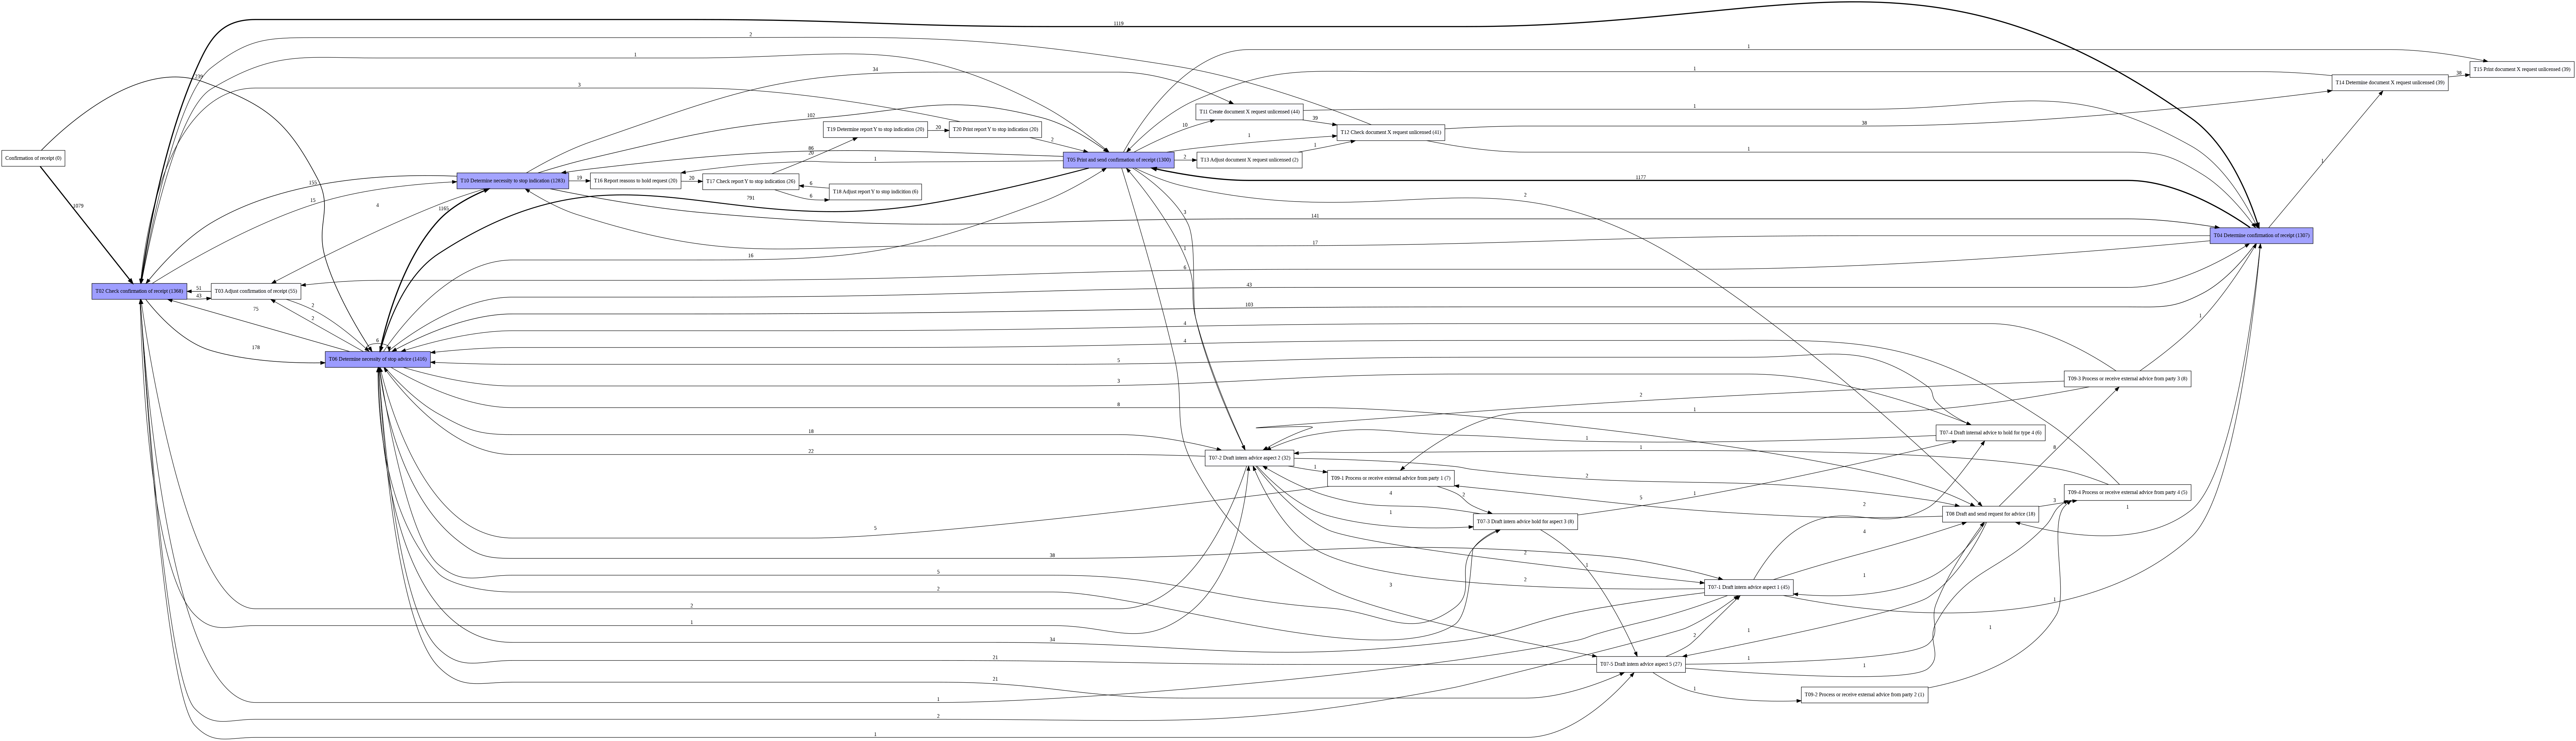

In [34]:
pm4py.view_dfg (dfg_graph, dfg_start_activities, dfg_end_activities)

In [35]:
# Exporting the DFG process map as image
dfg_plotfile = 'sample_data/Plot_DFG_ProcessMap.png'

pm4py.save_vis_dfg (dfg_graph, dfg_start_activities, dfg_end_activities, dfg_plotfile)

''

---  
### D4) Graph Theory for Process Maps using [networkX](https://networkx.org/)

In [36]:
%matplotlib inline
import networkx as nx
import itertools as it

### **Converting** the Process Map

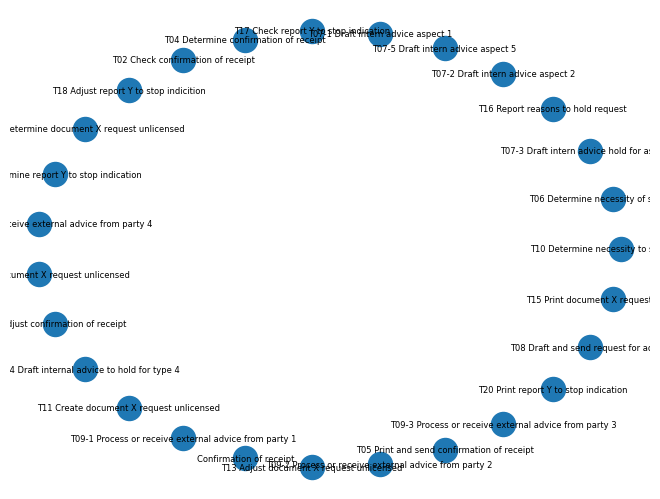

In [37]:
G = nx.DiGraph()

alphabet = set(list(it.chain.from_iterable([[a,b] for (a,b) in dfg[0]]))).union(dfg[1].keys()).union(dfg[2].keys())

G.add_nodes_from(alphabet) # adding nodes

nx.draw_circular(G, font_size=6, with_labels = True)

#### Adding Arcs

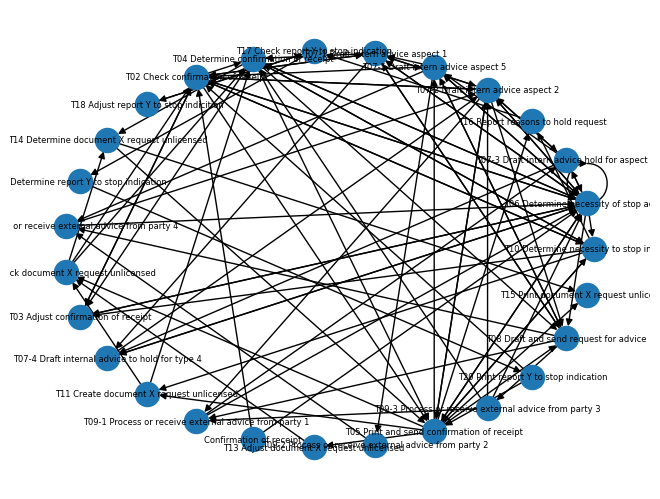

In [38]:
G.add_edges_from(dfg[0].keys())
nx.draw_circular(G, font_size=6, with_labels = True)

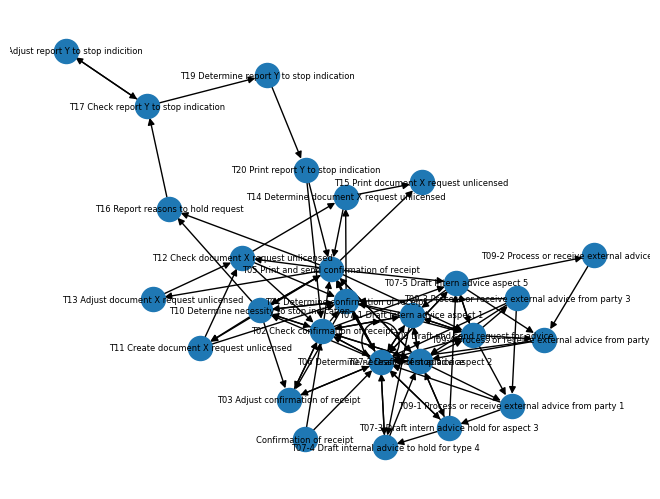

In [39]:
nx.draw_kamada_kawai(G, font_size=6, with_labels = True)

In [40]:
# Exporting the network graph
# nx.(G, font_size=6, with_labels = True)

### Degree of Vertices

The *indegree* of a vertex $v$, i.e., $deg^-(v)$, represents the number of *incoming arcs* of $v$ in $G$. ($deg^+(v)$ is defined symmetrically)

In [41]:
sorted([(n, i) for (n,i) in G.in_degree()], key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 14),
 ('T07-2 Draft intern advice aspect 2', 8),
 ('T02 Check confirmation of receipt', 8),
 ('T04 Determine confirmation of receipt', 7),
 ('T05 Print and send confirmation of receipt', 7),
 ('T08 Draft and send request for advice', 6),
 ('T07-5 Draft intern advice aspect 5', 5),
 ('T07-1 Draft intern advice aspect 1', 5),
 ('T10 Determine necessity to stop indication', 4),
 ('T03 Adjust confirmation of receipt', 4),
 ('T07-3 Draft intern advice hold for aspect 3', 3),
 ('T09-4 Process or receive external advice from party 4', 3),
 ('T12 Check document X request unlicensed', 3),
 ('T07-4 Draft internal advice to hold for type 4', 3),
 ('T09-1 Process or receive external advice from party 1', 3),
 ('T16 Report reasons to hold request', 2),
 ('T17 Check report Y to stop indication', 2),
 ('T14 Determine document X request unlicensed', 2),
 ('T11 Create document X request unlicensed', 2),
 ('T15 Print document X request unlicensed', 2),
 ('T18 

### Dominator of a Graph

A vertex $d$ dominates a vertex $v$ in a graph $G$ iff every path from some given *entry node* $s$ visits $d$

In [42]:
nx.immediate_dominators(G, 'Confirmation of receipt')

{'Confirmation of receipt': 'Confirmation of receipt',
 'T02 Check confirmation of receipt': 'Confirmation of receipt',
 'T03 Adjust confirmation of receipt': 'Confirmation of receipt',
 'T06 Determine necessity of stop advice': 'Confirmation of receipt',
 'T04 Determine confirmation of receipt': 'Confirmation of receipt',
 'T05 Print and send confirmation of receipt': 'Confirmation of receipt',
 'T13 Adjust document X request unlicensed': 'T05 Print and send confirmation of receipt',
 'T10 Determine necessity to stop indication': 'Confirmation of receipt',
 'T16 Report reasons to hold request': 'Confirmation of receipt',
 'T17 Check report Y to stop indication': 'T16 Report reasons to hold request',
 'T19 Determine report Y to stop indication': 'T17 Check report Y to stop indication',
 'T20 Print report Y to stop indication': 'T19 Determine report Y to stop indication',
 'T18 Adjust report Y to stop indicition': 'T17 Check report Y to stop indication',
 'T11 Create document X request 

### Centrality of a Node

In [43]:
sorted(nx.degree_centrality(G).items(), key=lambda t: t[1], reverse=True)

[('T06 Determine necessity of stop advice', 1.0),
 ('T05 Print and send confirmation of receipt', 0.6538461538461539),
 ('T02 Check confirmation of receipt', 0.6153846153846154),
 ('T07-2 Draft intern advice aspect 2', 0.576923076923077),
 ('T04 Determine confirmation of receipt', 0.5),
 ('T07-1 Draft intern advice aspect 1', 0.42307692307692313),
 ('T08 Draft and send request for advice', 0.42307692307692313),
 ('T10 Determine necessity to stop indication', 0.38461538461538464),
 ('T07-5 Draft intern advice aspect 5', 0.38461538461538464),
 ('T07-3 Draft intern advice hold for aspect 3', 0.2692307692307693),
 ('T12 Check document X request unlicensed', 0.23076923076923078),
 ('T03 Adjust confirmation of receipt', 0.23076923076923078),
 ('T09-4 Process or receive external advice from party 4',
  0.19230769230769232),
 ('T07-4 Draft internal advice to hold for type 4', 0.19230769230769232),
 ('T09-1 Process or receive external advice from party 1',
  0.19230769230769232),
 ('T09-3 Proce

---  
## E) **Discovering** Process **Models**

### E1) Discovering a **BPMN Model** (Raw Data)

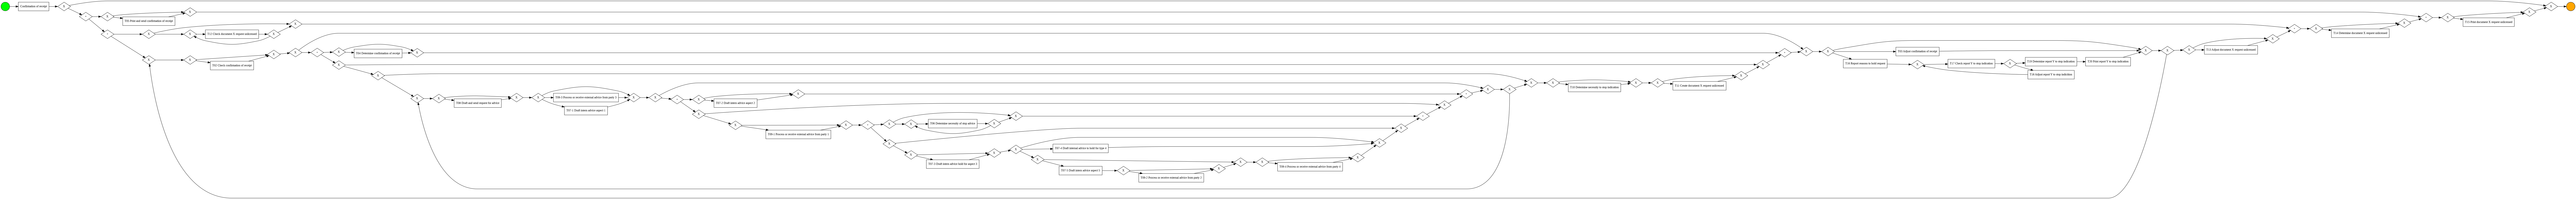

In [44]:
bpmn1 = pm4py.discover_bpmn_inductive(df)

pm4py.view_bpmn(bpmn1)

In [45]:
# Export the BPNM process graph
bpmn1_plotfile = 'sample_data/Plot_BPMN-Model1.png'

pm4py.save_vis_bpmn(bpmn1, bpmn1_plotfile)

''

### E2) Discovering a **BPMN Model** (Internal Filtering)

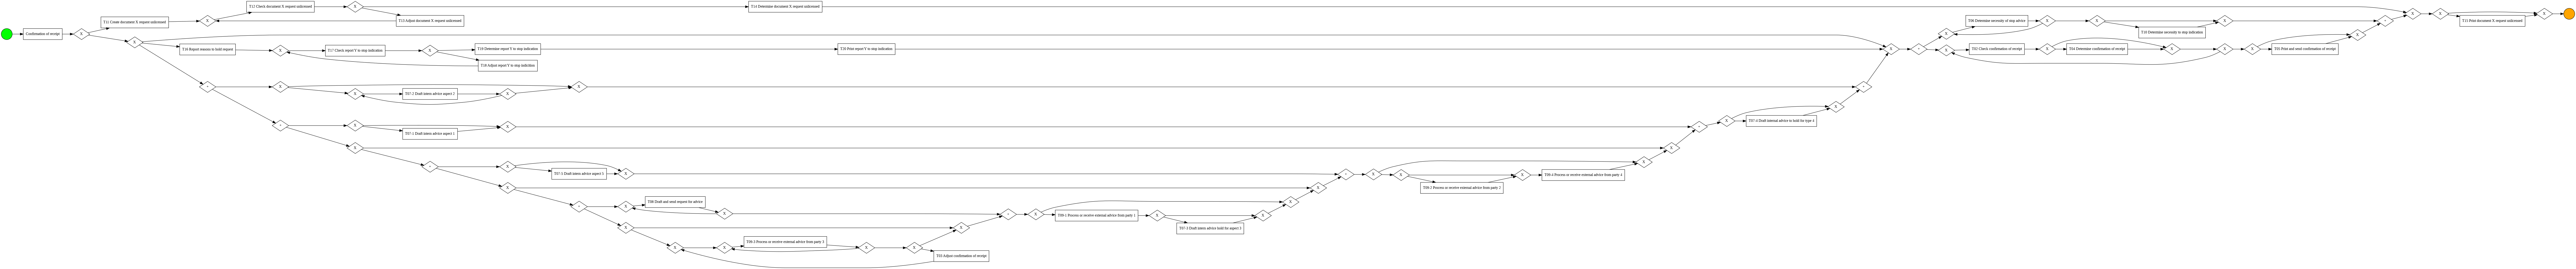

In [46]:
bpmn2 = pm4py.discover_bpmn_inductive(df, noise_threshold=0.1)

pm4py.view_bpmn(bpmn2)

In [47]:
# Export the BPNM process graph
bpmn2_plotfile = 'sample_data/Plot_BPMN-Model2.png'

pm4py.save_vis_bpmn(bpmn2, bpmn2_plotfile)

''

In [48]:
## Export the BPMN process model
bpmn2_modelfile = 'sample_data/Data_BPMN-Model2'

pm4py.write_bpmn(bpmn2, bpmn2_modelfile)

### E3) Converting to a **Petri Net Model**

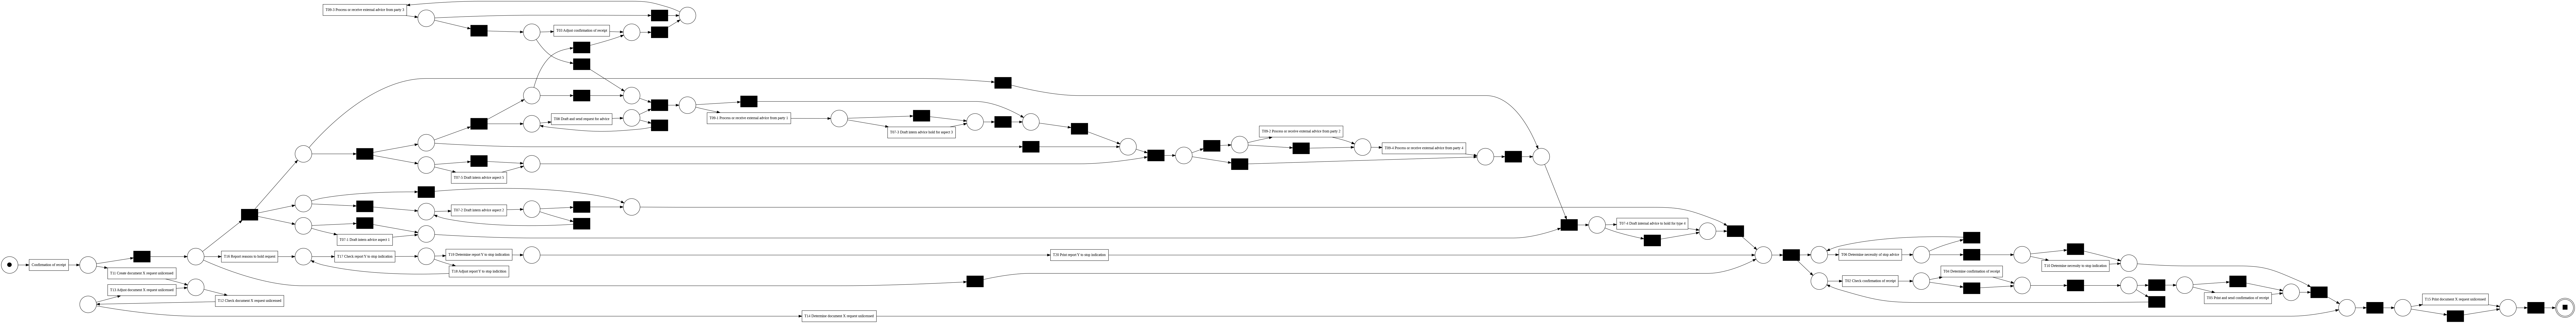

In [49]:
pn, im, fm = pm4py.convert_to_petri_net(bpmn2)

pm4py.view_petri_net(pn, im, fm)

In [50]:
# Export the Petri Net process graph
pn_plotfile = 'sample_data/Plot_PetriNet-Model2.png'

pm4py.save_vis_petri_net(pn, im, fm, pn_plotfile)

''

In [51]:
## Export the Petri net process model (pnml)
# see https://xml.coverpages.org/WeberPNML200204.pdf and https://www.pnml.org/ for a detail description of the Petri net interchange format (pnml)
pn_modelfile = 'sample_data/Data_PetriNet-Model2'

pm4py.write_pnml(pn, im, fm, pn_modelfile)

![](https://github.com/sawubona-repo/BINA-FS24-WORK/blob/main/LB07-ProcessMining/Python/img/pm_generic.png?raw=1)